### Importing packages

In [100]:
import tensorflow as tf
from tensorflow import keras        # keras is a dataset
import matplotlib.pyplot as plt
import numpy as np

In [101]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [102]:
print(len(X_train))
print(len(X_test))
X_train[0].shape

60000
10000


(28, 28)

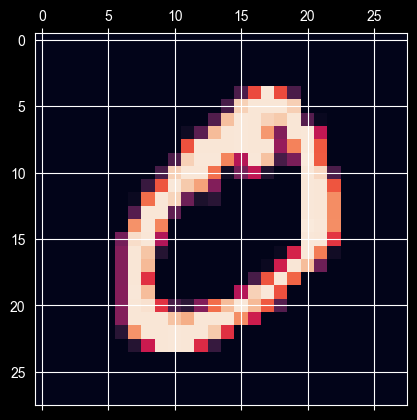

In [103]:
plt.matshow(X_train[1])

### ^ Hand Written Numbers

### Preprocessing (making all the dataset values in the 0 – 1 range) without using the MinMax pre-processing technique.

As using the basix mathematics as the pixel values range between 0 – 255. and dividing any number between the range with 255 will answer in the 0 to 1 range.

In [104]:
X_train = X_train / 255
X_test = X_test / 255

### Flatting the 2D image in to the 1D on every(60,000 train, 10,000 test) images.

* each image contains 28*28 pixels structure, which means 784 pixels.
* so create a 784-size array for each image


In [105]:
input_array_size = pow((X_train[0].shape[0]), 2)
X_train_flattened = X_train.reshape(len(X_train), input_array_size)
X_test_flattened = X_test.reshape(len(X_test), input_array_size)

## Understanding the Keras API Calls

### 1. Creating the Model — `keras.Sequential`

```python
model1 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid'),
])
```

| Parameter | Meaning                                    | Notes |
|-----------|--------------------------------------------|-------|
| keras.Sequential | Container stacking layers sequentially     | Feed‑forward only |
| Dense(10) | Fully connected layer with 10 output units | For digits 0‑9 |
| input_dim | Input feature size                         | 28×28 = 784 |
| activation | Activation function                        | sigmoid, relu, softmax |

**Result:** maps a 784‑D input vector to 10 outputs.

---

### 2. Compiling the Model — `model.compile`

```python
model1.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
```

| Parameter | Purpose | Alternatives |
|-----------|----------|-------------|
| optimizer | Weight update algorithm | adam, rmsprop |
| loss | Training objective | categorical_crossentropy |
| metrics | Monitoring metric | precision, AUC |

**Why sparse?** Labels are integers, not one‑hot encoded.

---

### 3. Training the Model — `model.fit`

```python
model1.fit(X_train_flattened, y_train, epochs=5)
```

| Parameter | Description |
|-----------|-------------|
| X_train_flattened | Feature matrix |
| y_train | Integer class labels |
| epochs | Number of full passes |
| batch_size | Defaults to 32 |
| validation_data | Optional validation set |

**Training steps:** forward pass → loss → backprop → update weights.

---



In [112]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid'),       # output layer
])

model1.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 774us/step - accuracy: 0.8104 - loss: 0.7836
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.8801 - loss: 0.4578
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.8909 - loss: 0.4042
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8965 - loss: 0.3774
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9006 - loss: 0.3605


## Calculate the model accuracy score

In [114]:
model1.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9077 - loss: 0.3362


[0.3361569941043854, 0.9077000021934509]

## Predict result in the X_test dataset's first value

In [119]:
predicted = model1.predict(X_test_flattened)
predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


array([0.47125438, 0.00362721, 0.4710134 , 0.84881544, 0.19259578,
       0.2378113 , 0.01790461, 0.9997105 , 0.36574095, 0.8987353 ],
      dtype=float32)

#### In the above result, we have the max value is 0.9997105 that is associated with the 7'th position/number.

7


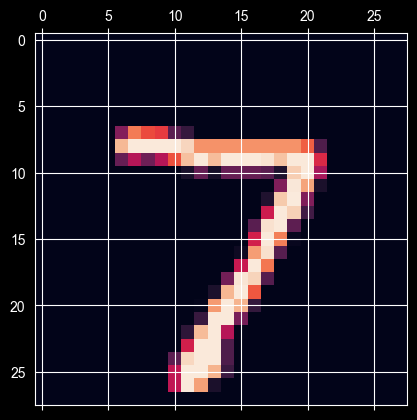

In [124]:
print(np.argmax(predicted[0]))          # returns the position of the max value in the array --> 7
plt.matshow(X_test[0])